In [1]:
# Load the required libraries and set a seed
library(Seurat)
library(Signac)
library(reshape2)
library(dplyr)
library(ggplot2)
library(caret)
library(glue)
set.seed(1234)

setwd("~/projects/deepscore")
source("R/deepscore.R")
source("R/marker_analysis.R")

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice



In [ ]:
# Recommended way to install Keras in R
install.packages("devtools")
devtools::install_github("rstudio/tensorflow")
devtools::install_github("rstudio/keras")

In [2]:
library(keras)
keras$"__version__"

Loaded Tensorflow version 2.6.0



[1] "2.6.0"

In [3]:
# If reading the data from an .rds objects:
kidney.rna <- readRDS("~/projects/kidney/Nuc/kidney.rna.rds")
kidney.atac.comb <- readRDS("~/projects/kidney/Atac/kidney.atac_combpeaks.rds")

kidney.multi.comb <- readRDS("~/projects/kidney/Multi/kidney.multi_combpeaks.rds")

In [4]:
# Clean Seurat objects just for simplicity's sake
DefaultAssay(kidney.atac.comb) <- "peaks"
kidney.atac.comb <- DietSeurat(kidney.atac.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.atac.comb@reductions), 
                               graphs = names(kidney.atac.comb@graphs))

DefaultAssay(kidney.multi.comb) <- "peaks"
kidney.multi.comb <- DietSeurat(kidney.multi.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.multi.comb@reductions), 
                               graphs = names(kidney.multi.comb@graphs))

In [5]:
kidney.atac.comb
kidney.multi.comb
kidney.rna

An object of class Seurat 
173743 features across 5638 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
190737 features across 3243 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
20967 features across 3760 samples within 1 assay 
Active assay: RNA (20967 features, 800 variable features)
 2 dimensional reductions calculated: pca, umap

# Using the multiome RNA and the single assay RNA

In [7]:
# Specify desired assay to work with gene expression
DefaultAssay(kidney.multi.comb) <- "RNA"
DefaultAssay(kidney.rna) <- "RNA"

In [11]:
# Find the gene markers for the reference where our model will be trained
multi.rna.m <- FindAllMarkers(kidney.multi.comb, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(multi.rna.m, file = "data/multi.rna.m.rds")

In [12]:
multi.rna.m <- readRDS("data/multi.rna.m.rds")
dim(multi.rna.m)

[1] 9495    7

In [13]:
# Check the top 10 markers for each of the reference clusters
top_markers(multi.rna.m)

$PT
 [1] "RNF212B" "CUBN"    "ACSM2B"  "SLC22A6" "SLC13A3" "PCDH15"  "PLG"    
 [8] "ACSM2A"  "AFM"     "ALDOB"  

$PT_VCAM1
 [1] "RHEX"   "UGT2A3" "CDH6"   "ALPK2"  "EPHA7"  "DLGAP1" "CDH2"   "HAVCR1"
 [9] "KCTD16" "PRUNE2"

$PEC
 [1] "SLC4A11"   "WSCD2"     "MGAT4C"    "CFH"       "COL11A1"   "LINC01435"
 [7] "OCA2"      "LINC01197" "TMEM130"   "EDIL3"    

$TAL
 [1] "SLC12A1"   "CASR"      "SIM2"      "ENOX1"     "LINC01606" "NPSR1-AS1"
 [7] "ACPP"      "UMOD"      "GPC5"      "ERBB4"    

$DCT1
 [1] "ADAMTS17"   "TMEM52B"    "SALL3"      "DNER"       "SLC43A1"   
 [6] "AC078980.1" "LINC01896"  "DEFB1"      "FMN1"       "CPXM2"     

$DCT2
 [1] "LINC01890"  "AC087341.1" "JMJD1C-AS1" "LINC02385"  "AC093072.1"
 [6] "HAS1"       "AP001468.1" "LPAR4"      "GABRG1"     "AC127520.1"

$CNT
 [1] "LINC01099"  "CALB1"      "LINC01098"  "SCN2A"      "AC019197.1"
 [6] "HSD11B2"    "RGS6"       "SLC8A1-AS1" "PCDH7"      "BARX2"     

$PC
 [1] "GATA3"    "AQP2"     "PIK3C2G"  "PWRN1"    "KSR2"     "PKIA"    
 [7] "PDE10A"   "SCNN1G"   "COL4A6"   "SLC38A11"

$ICA
 [1] "CLNK"      "NXPH2"     "LINC01187" "ATP6V1C2"  "DMRT2"     "TMEM101"  
 [7] "LY86-AS1"  "THRB-AS1"  "ATP6V0D2"  "KIT"      

$ICB
 [1] "SLC26A4"  "INSRR"    "SLC4A9"   "CSMD3"    "TLDC2"    "DNAH11"  
 [7] "HPSE"     "HEPACAM2" "KCNJ6"    "CDH12"   

$PODO
 [1] "PTPRQ"      "NTNG1"      "AC109466.1" "FMN2"       "NPHS2"     
 [6] "ADAMTS19"   "AC008415.1" "AC092813.2" "LINC02149"  "NPHS1"     

$ENDO
 [1] "EMCN"    "ADGRL4"  "TEK"     "PECAM1"  "PTPRB"   "LDB2"    "FLT1"   
 [8] "ERG"     "RAPGEF4" "NOTCH4" 

$MES
 [1] "AC114316.1" "WFDC1"      "ADCY3"      "PDGFRB"     "DAAM2"     
 [6] "CSPG4"      "AGTR1"      "AC073941.1" "PRR16"      "ABCC8"     

$FIB
 [1] "C7"        "PDGFRA"    "LINC00924" "ABCA8"     "FBLN5"     "COL6A3"   
 [7] "MOXD1"     "PID1"      "LAMA2"     "TRPC4"    

$LEUK
 [1] "IKZF1"    "ARHGAP15" "PTPRC"    "PIK3R5"   "IL7R"     "CXCR4"   
 [7] "PRKCB"    "CD53"     "CD247"    "ITK"

### Find common features between the two datasets and filter the others:

In [22]:
# Find the common top genes that are highly variable in both datasets and are
# shared in both the reference and the query, in an iterative manner
common_genes <- find_common_variable_genes(kidney.multi.comb, kidney.rna,
                                           sample.assay="RNA", target_n_genes = 4000)

Looking for 10000 HVG
Found 4269 genes in common


In [20]:
# Or find the marker genes that we have computed from the reference in the highly
# variable genes from our query dataset, in an iterative manner
common_genes <- find_refmarkers_in_variable_genes(multi.rna.m, kidney.rna,
                                                  sample.assay="RNA", target_n_genes = 2000)

Looking for 267 marker genes from each label
Found 949 genes in common
Looking for 367 marker genes from each label
Found 1181 genes in common
Looking for 467 marker genes from each label
Found 1376 genes in common
Looking for 567 marker genes from each label
Found 1577 genes in common
Looking for 667 marker genes from each label
Found 1748 genes in common
Looking for 767 marker genes from each label
Found 1830 genes in common
Looking for 867 marker genes from each label
Found 1883 genes in common
Looking for 967 marker genes from each label
Found 1927 genes in common
Looking for 1067 marker genes from each label
Found 1984 genes in common
Looking for 1167 marker genes from each label
Found 2090 genes in common


In [23]:
# Or find the marker genes that we have computed from the reference in all the genes
# from our query dataset, in an iterative manenr
common_genes <- find_refmarkers_in_genes(multi.rna.m, kidney.rna,
                                         sample.assay="RNA", target_n_genes = 4000)

Looking for 267 marker genes from each label
Found 2893 genes in common
Looking for 367 marker genes from each label
Found 3460 genes in common
Looking for 467 marker genes from each label
Found 3900 genes in common
Looking for 567 marker genes from each label
Found 4321 genes in common


### Prepare the reference data and train model:

In [24]:
# Instantiate our model, specifying the desired features for
# our architecture
ds <- DeepScore(
        hidden_nodes=c(512, 64), 
        common_features=common_genes, 
        n_labels=16, 
        epochs=15, 
        batch_size=64, 
        activation="relu", 
        dropout=TRUE, 
        dropout_rate=0.5, 
        batchnorm=TRUE, 
        lr=0.001,
        weight_reg=TRUE
)

# Set the reference for our model and the information we want to transfer
ds <- ds %>% set_reference(kidney.multi.comb, kidney.multi.comb$annotation, assay="RNA")

[1] "Model evaluation on unseen data:"
     loss  accuracy 
0.3245322 0.9296636 


`geom_smooth()` using formula 'y ~ x'



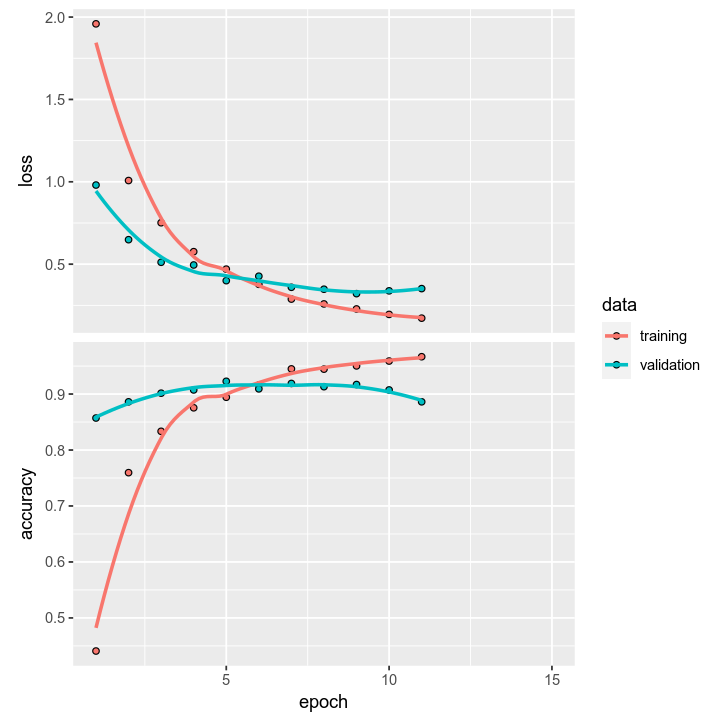

In [25]:
# Train the model
ds <- ds %>% train()

In [26]:
# Save the trained model in our directory as an .hdf5 file
save_model_hdf5(ds$model, filepath = "data/kidney_rna_model.hdf5")

### Predict the celltypes in our sample using the trained model:

In [27]:
# Load the saved trained model
ds$model <- load_model_hdf5(filepath="data/kidney_rna_model.hdf5")

# Annotate our query dataset
kidney.rna <- annotate(ds, query = kidney.rna, assay = "RNA")
table(kidney.rna$ds_prediction)


         CNT         DCT1         ENDO          FIB          ICA          ICB 
          24           76            7            2          157            4 
         MES           PC         PODO           PT     PT_VCAM1          TAL 
           2          167           62         2307          238          539 
unclassified 
         175 

In [28]:
p <- DimPlot(kidney.rna)
pbuild <- ggplot_build(p)
pdata <- pbuild$data[[1]]

pdata <-  pdata[order(pdata$group),]
mycols <- unique(pdata$colour)
names(mycols) <- unique(kidney.rna$ds_prediction)
mycols <- c(mycols, "LEUK"="#8494FF", "LEUK (MP)"="#8494FF",
           "LEUK (T cell)"="#8494FF")
mycols 

PT  unclassified           TAL      PT_VCAM1           ICA 
    "#F8766D"     "#E18A00"     "#BE9C00"     "#8CAB00"     "#24B700" 
           PC          PODO          DCT1          ENDO           CNT 
    "#00BE70"     "#00C1AB"     "#00BBDA"     "#00ACFC"     "#8B93FF" 
          MES           ICB           FIB          LEUK     LEUK (MP) 
    "#D575FE"     "#F962DD"     "#FF65AC"     "#8494FF"     "#8494FF" 
LEUK (T cell) 
    "#8494FF"

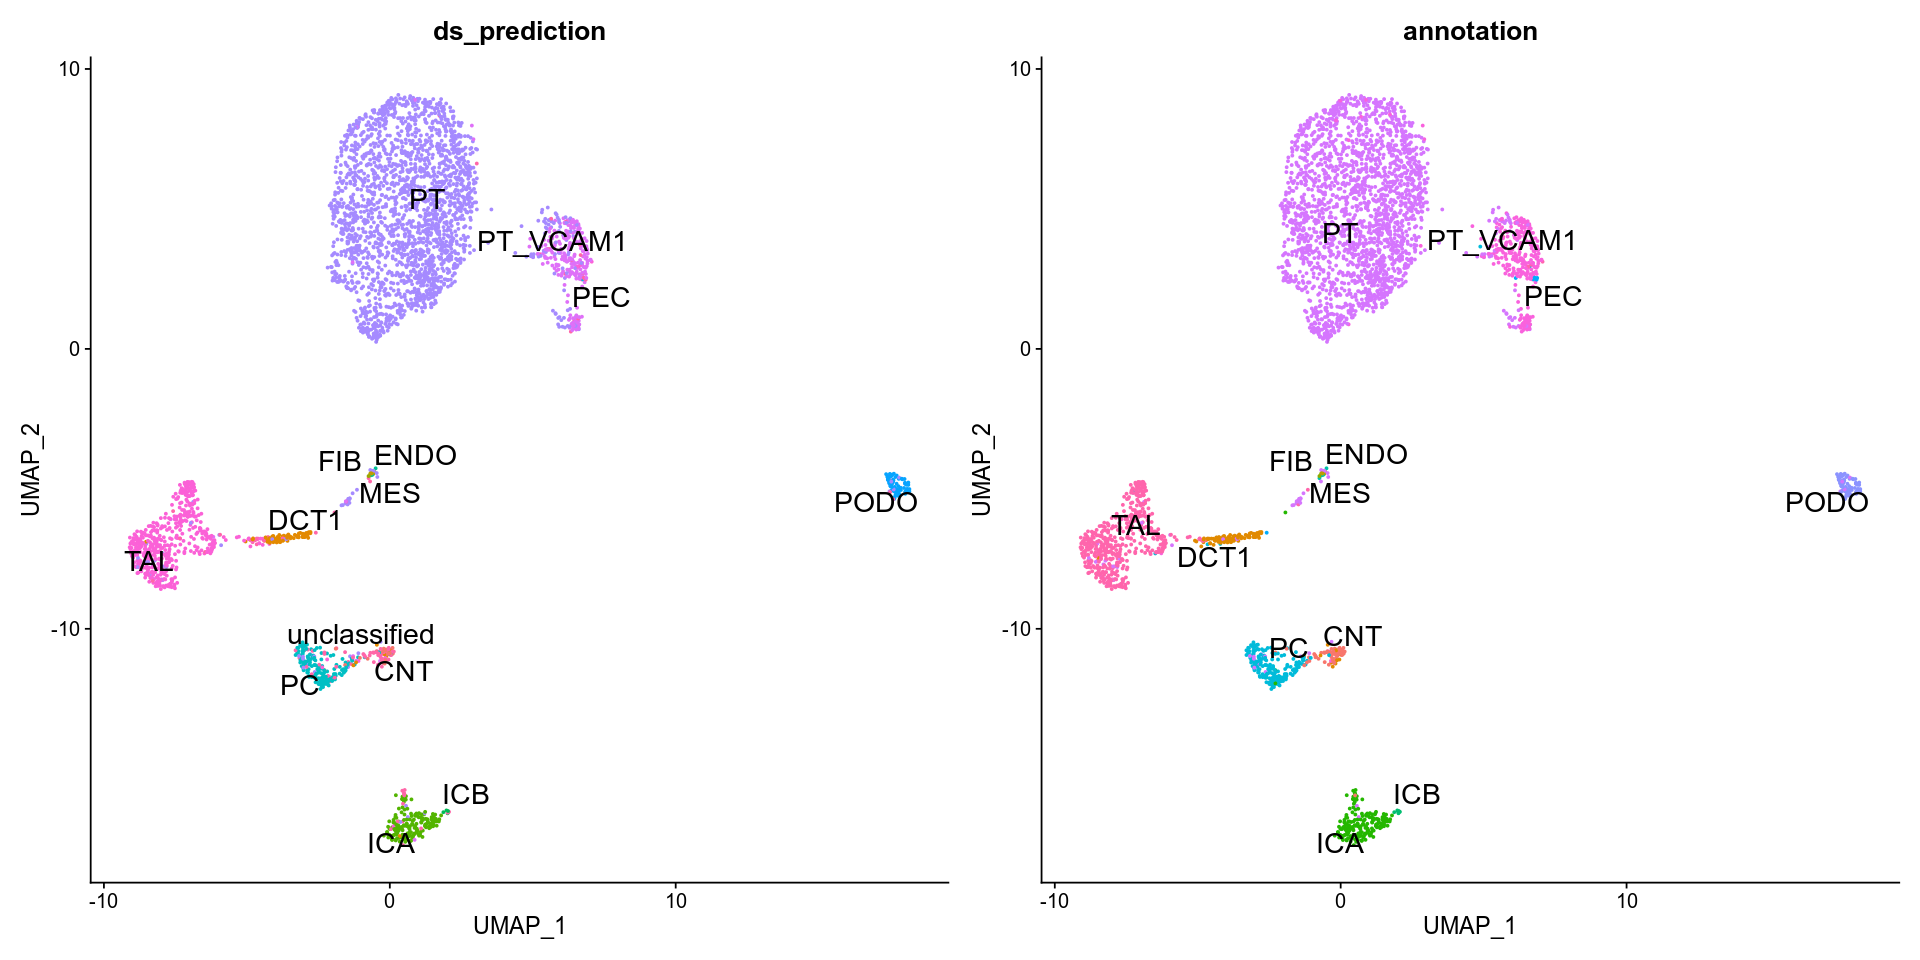

In [41]:
options(repr.plot.width=16, repr.plot.height=8)

# Visualize the predictions from our model in a UMAP and compare with ground truth anntoation
p1 <- DimPlot(kidney.rna, group.by = "ds_prediction", label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()
p2 <- DimPlot(kidney.rna, group.by = 'annotation', label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()

p1 + p2

In [29]:
Idents(kidney.rna) <- "ds_prediction"
mat_rna <- subset(kidney.rna, idents = "unclassified", invert = TRUE)

#Creating confusion matrix
mat_rna$ds_prediction <- droplevels(mat_rna$ds_prediction)
confmat <- confusionMatrix(data=mat_rna$ds_prediction, reference = mat_rna$annotation)
confmat$overall

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(data = mat_rna$ds_prediction, reference = mat_rna$annotation):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.9682008      0.9435520      0.9619225      0.9736995      0.6292887 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

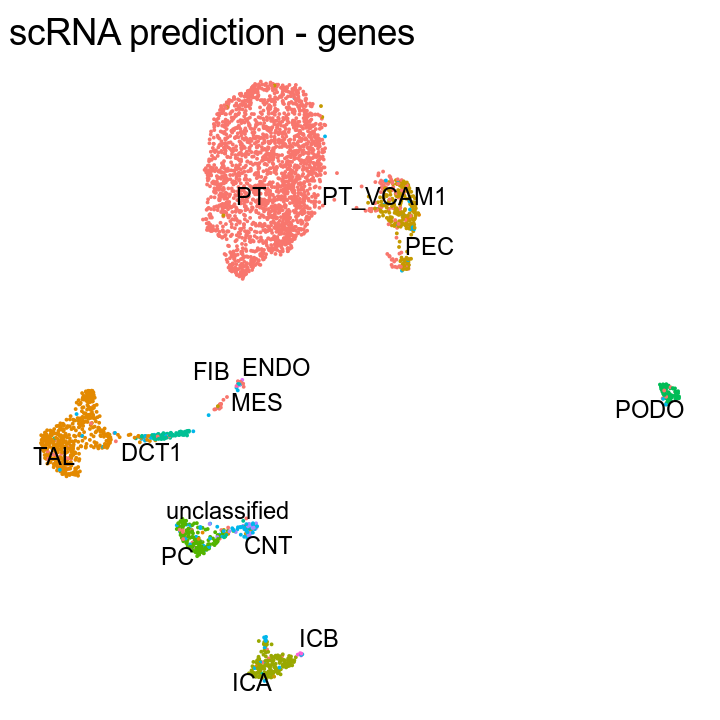

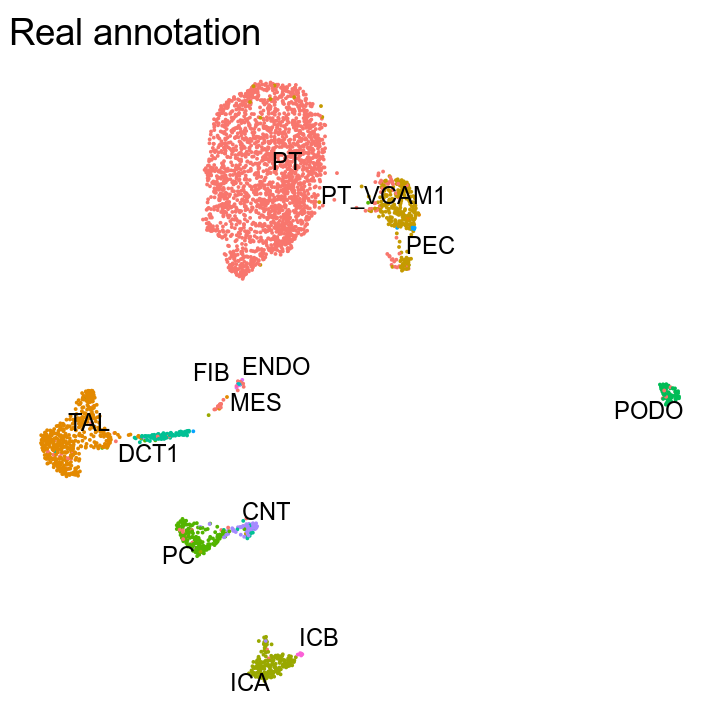

In [141]:
options(repr.plot.width=6, repr.plot.height=6)

DimPlot(kidney.rna, group.by = "ds_prediction", label = TRUE,  cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("scRNA prediction - genes")
DimPlot(kidney.rna, group.by = 'annotation', label = TRUE,  cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("Real annotation")

In [60]:
Idents(kidney.rna) <- "ds_prediction"

# Compute the marker genes for the predicted annotation in our query dataset
rna.pred.m <- FindAllMarkers(kidney.rna, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(rna.pred.m, file = "data/rna.pred.m.rds")

Calculating cluster CNT

Calculating cluster DCT1

Calculating cluster ENDO

Calculating cluster FIB

Calculating cluster ICA

Calculating cluster ICB

Calculating cluster MES

Calculating cluster PC

Calculating cluster PEC

Calculating cluster PODO

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster TAL

Calculating cluster unclassified



In [61]:
rna.pred.m <- readRDS("data/rna.pred.m.rds")

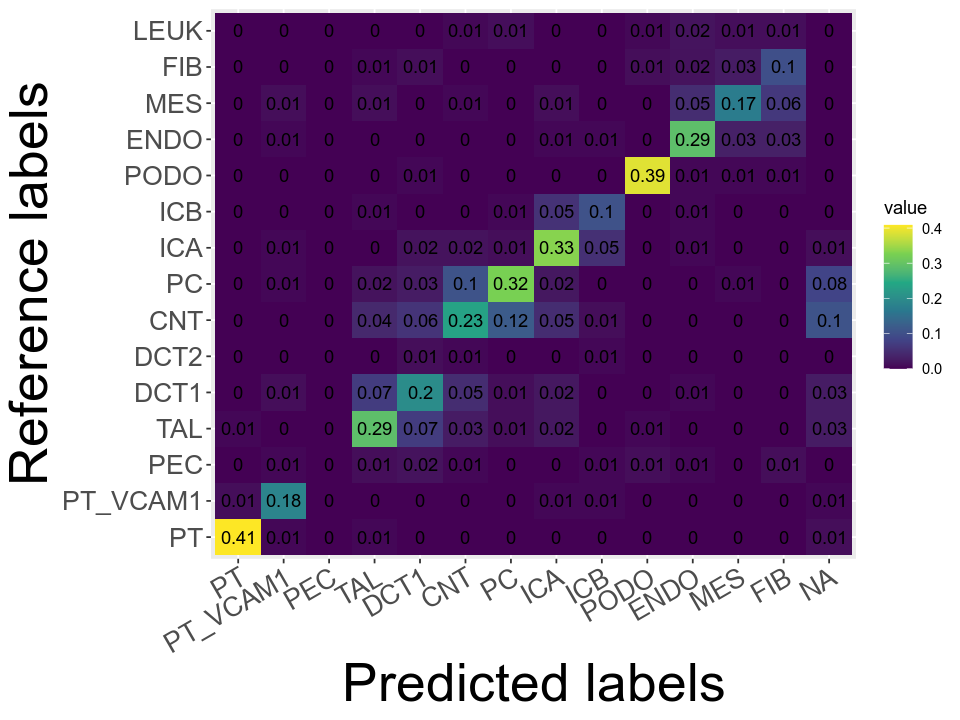

In [62]:
ref <- top_markers(multi.rna.m, ntop = 100)
q <- top_markers(rna.pred.m, ntop = 100)

# Plot the Jaccard Index matrix as a heatmap to visualize
# the similarity between the gene expression of the clusters
# from the reference and the predicted in our query dataset
options(repr.plot.width=8, repr.plot.height=6)
ms <- matchSCore2(ref, q)
ms$gg + theme(axis.title = element_text(size=32))

In [ ]:
# Clean the cache
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6336514,338.5,11262328,601.5,11262328,601.5
Vcells,366869191,2799.0,586392405,4473.9,521499413,3978.8


# Using the multiome RNA and the gene activity inferred from ATAC

In [6]:
# Specify desired assay to work with gene expression
DefaultAssay(kidney.multi.comb) <- "RNA"
DefaultAssay(kidney.atac.comb) <- "RNA"

In [67]:
# Find the gene markers for the reference where our model will be trained
multi.rna.m <- FindAllMarkers(kidney.multi.comb, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(multi.rna.m, file = "data/multi.rna.m.rds")

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster PEC

Calculating cluster TAL

Calculating cluster DCT1

Calculating cluster DCT2

Calculating cluster CNT

Calculating cluster PC

Calculating cluster ICA

Calculating cluster ICB

Calculating cluster PODO

Calculating cluster ENDO

Calculating cluster MES

Calculating cluster FIB

Calculating cluster LEUK



In [7]:
multi.rna.m <- readRDS("data/multi.rna.m.rds")
dim(multi.rna.m)

[1] 9495    7

In [8]:
# Check the top 10 markers for each of the reference clusters
top_markers(multi.rna.m)

$PT
 [1] "RNF212B" "CUBN"    "ACSM2B"  "SLC22A6" "SLC13A3" "PCDH15"  "PLG"    
 [8] "ACSM2A"  "AFM"     "ALDOB"  

$PT_VCAM1
 [1] "RHEX"   "UGT2A3" "CDH6"   "ALPK2"  "EPHA7"  "DLGAP1" "CDH2"   "HAVCR1"
 [9] "KCTD16" "PRUNE2"

$PEC
 [1] "SLC4A11"   "WSCD2"     "MGAT4C"    "CFH"       "COL11A1"   "LINC01435"
 [7] "OCA2"      "LINC01197" "TMEM130"   "EDIL3"    

$TAL
 [1] "SLC12A1"   "CASR"      "SIM2"      "ENOX1"     "LINC01606" "NPSR1-AS1"
 [7] "ACPP"      "UMOD"      "GPC5"      "ERBB4"    

$DCT1
 [1] "ADAMTS17"   "TMEM52B"    "SALL3"      "DNER"       "SLC43A1"   
 [6] "AC078980.1" "LINC01896"  "DEFB1"      "FMN1"       "CPXM2"     

$DCT2
 [1] "LINC01890"  "AC087341.1" "JMJD1C-AS1" "LINC02385"  "AC093072.1"
 [6] "HAS1"       "AP001468.1" "LPAR4"      "GABRG1"     "AC127520.1"

$CNT
 [1] "LINC01099"  "CALB1"      "LINC01098"  "SCN2A"      "AC019197.1"
 [6] "HSD11B2"    "RGS6"       "SLC8A1-AS1" "PCDH7"      "BARX2"     

$PC
 [1] "GATA3"    "AQP2"     "PIK3C2G"  "PWRN1"    "KSR2"     "PKIA"    
 [7] "PDE10A"   "SCNN1G"   "COL4A6"   "SLC38A11"

$ICA
 [1] "CLNK"      "NXPH2"     "LINC01187" "ATP6V1C2"  "DMRT2"     "TMEM101"  
 [7] "LY86-AS1"  "THRB-AS1"  "ATP6V0D2"  "KIT"      

$ICB
 [1] "SLC26A4"  "INSRR"    "SLC4A9"   "CSMD3"    "TLDC2"    "DNAH11"  
 [7] "HPSE"     "HEPACAM2" "KCNJ6"    "CDH12"   

$PODO
 [1] "PTPRQ"      "NTNG1"      "AC109466.1" "FMN2"       "NPHS2"     
 [6] "ADAMTS19"   "AC008415.1" "AC092813.2" "LINC02149"  "NPHS1"     

$ENDO
 [1] "EMCN"    "ADGRL4"  "TEK"     "PECAM1"  "PTPRB"   "LDB2"    "FLT1"   
 [8] "ERG"     "RAPGEF4" "NOTCH4" 

$MES
 [1] "AC114316.1" "WFDC1"      "ADCY3"      "PDGFRB"     "DAAM2"     
 [6] "CSPG4"      "AGTR1"      "AC073941.1" "PRR16"      "ABCC8"     

$FIB
 [1] "C7"        "PDGFRA"    "LINC00924" "ABCA8"     "FBLN5"     "COL6A3"   
 [7] "MOXD1"     "PID1"      "LAMA2"     "TRPC4"    

$LEUK
 [1] "IKZF1"    "ARHGAP15" "PTPRC"    "PIK3R5"   "IL7R"     "CXCR4"   
 [7] "PRKCB"    "CD53"     "CD247"    "ITK"

### Find common features between the two datasets and filter the others:

In [12]:
# Find the common top genes that are highly variable in both datasets and are
# shared in both the reference and the query, in an iterative manner
common_genes <- find_common_variable_genes(kidney.multi.comb, kidney.atac.comb,
                                           sample.assay="RNA")

Looking for 10000 HVG
Found 3262 genes in common
Looking for 11000 HVG
Found 3713 genes in common
Looking for 12000 HVG
Found 4073 genes in common


In [169]:
# Or find the marker genes that we have computed from the reference in the highly
# variable genes from our query dataset, in an iterative manner
common_genes <- find_refmarkers_in_variable_genes(multi.rna.m, kidney.atac.comb,
                                                  sample.assay="RNA")

Looking for 267 marker genes from each label
Found 732 genes in common
Looking for 367 marker genes from each label
Found 913 genes in common
Looking for 467 marker genes from each label
Found 1053 genes in common
Looking for 567 marker genes from each label
Found 1214 genes in common
Looking for 667 marker genes from each label
Found 1410 genes in common
Looking for 767 marker genes from each label
Found 1616 genes in common
Looking for 867 marker genes from each label
Found 1763 genes in common
Looking for 967 marker genes from each label
Found 1917 genes in common
Looking for 1067 marker genes from each label
Found 2064 genes in common


In [11]:
# Or find the marker genes that we have computed from the reference in all the genes
# from our query dataset, in an iterative manenr
common_genes <- find_refmarkers_in_genes(multi.rna.m, kidney.atac.comb,
                                         sample.assay="RNA", target_n_genes = 5000)

Looking for 333 marker genes from each label
Found 2694 genes in common
Looking for 433 marker genes from each label
Found 3074 genes in common
Looking for 533 marker genes from each label
Found 3454 genes in common
Looking for 633 marker genes from each label
Found 3795 genes in common
Looking for 733 marker genes from each label
Found 4122 genes in common
Looking for 833 marker genes from each label
Found 4352 genes in common
Looking for 933 marker genes from each label
Found 4549 genes in common
Looking for 1033 marker genes from each label
Found 4711 genes in common
Looking for 1133 marker genes from each label
Found 4821 genes in common
Looking for 1233 marker genes from each label
Found 4899 genes in common
Looking for 1333 marker genes from each label
Found 4940 genes in common
Looking for 1433 marker genes from each label
Found 4975 genes in common
Looking for 1533 marker genes from each label
Found 5010 genes in common


### Prepare the reference data and train model:

In [12]:
# Instantiate our model, specifying the desired features for
# our architecture
ds <- DeepScore(
        hidden_nodes=c(512, 64), 
        common_features=common_genes, 
        n_labels=16, 
        epochs=20, 
        batch_size=64, 
        activation="relu", 
        dropout=TRUE, 
        dropout_rate=0.6, 
        batchnorm=TRUE, 
        lr=0.001,
        weight_reg=TRUE
)

# Set the reference for our model and the information we want to transfer
ds <- ds %>% set_reference(kidney.multi.comb, kidney.multi.comb$annotation, assay="RNA")

[1] "Model evaluation on unseen data:"
     loss  accuracy 
0.3529689 0.9143731 


`geom_smooth()` using formula 'y ~ x'



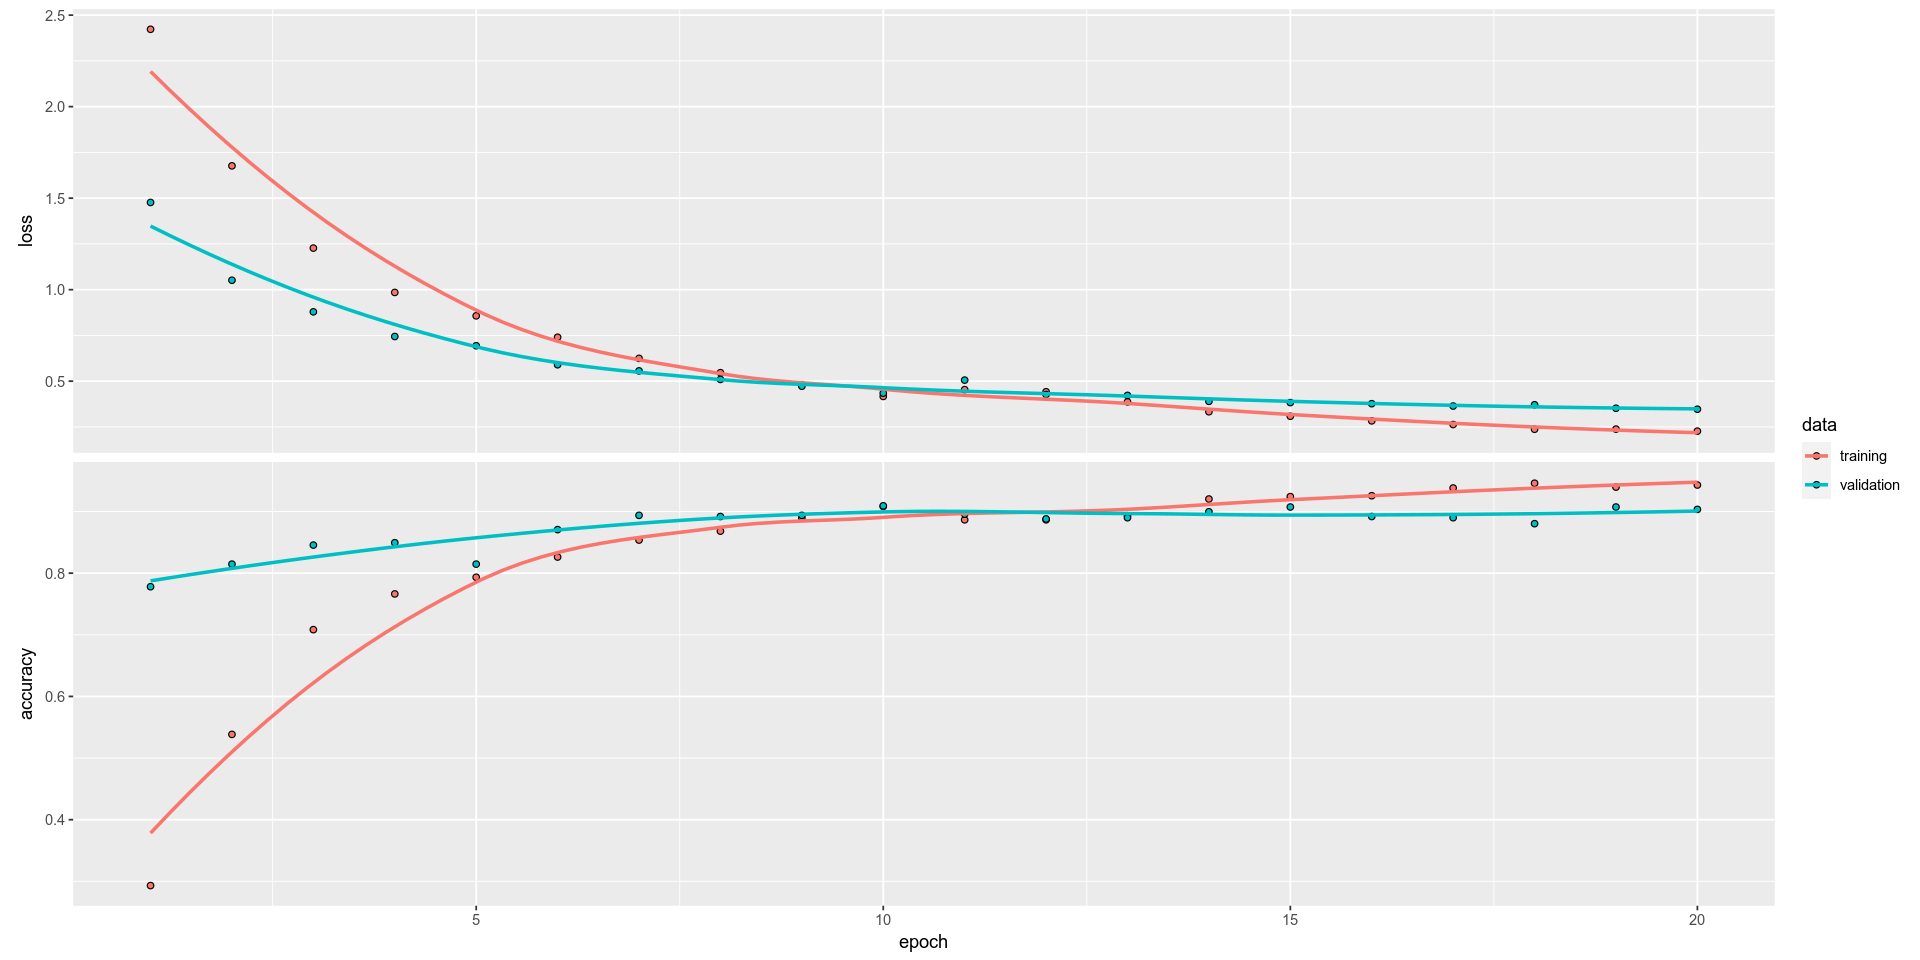

In [186]:
# Train the model
ds <- ds %>% train(patience=5)

In [187]:
# Save the trained model in our directory as an .hdf5 file
save_model_hdf5(ds$model, filepath = "data/kidney_rna_model.hdf5")

### Predict the celltypes in our sample using the trained model:

In [13]:
# Load the saved trained model
ds$model <- load_model_hdf5(filepath="data/kidney_rna_model.hdf5")

# Annotate our query dataset
kidney.atac.comb <- annotate(ds, query = kidney.atac.comb, assay = "RNA")
table(kidney.atac.comb$ds_prediction)


         CNT         ENDO          FIB          ICA         LEUK          MES 
           3         3102           60           47          293          104 
          PC         PODO           PT     PT_VCAM1          TAL unclassified 
          24           54           12          134           84         1721 

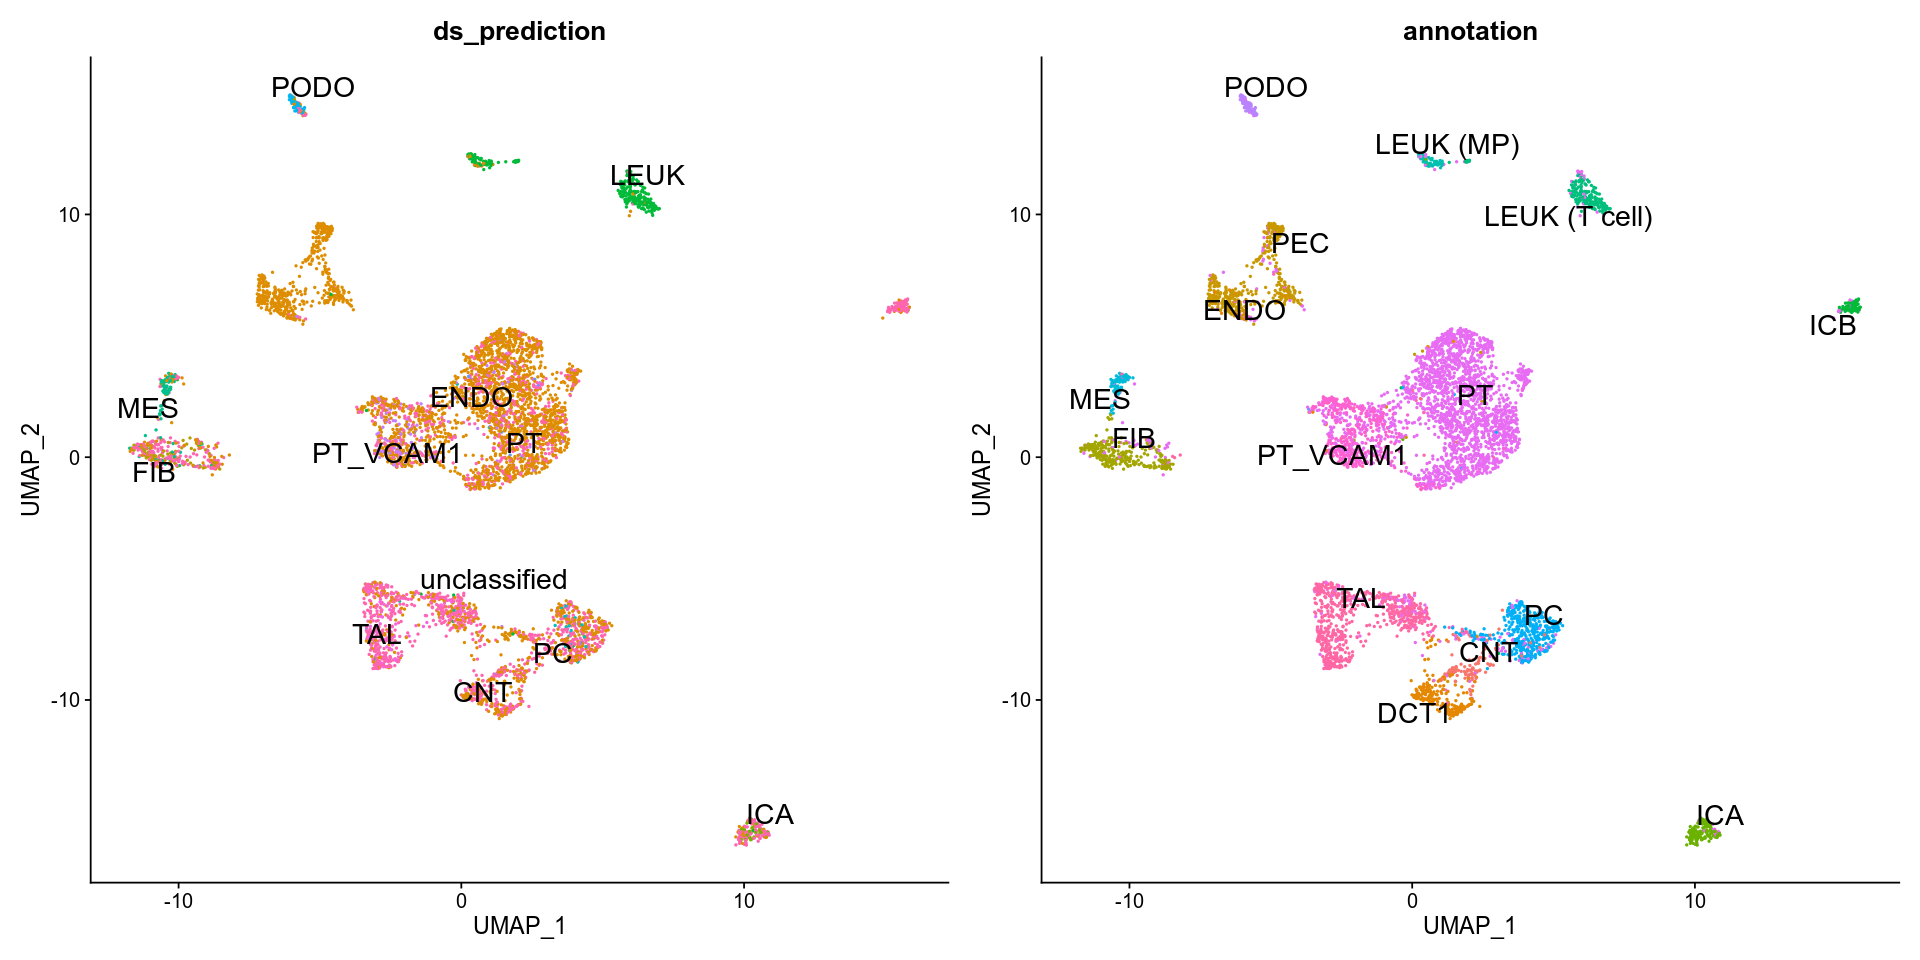

In [14]:
options(repr.plot.width=16, repr.plot.height=8)

# Visualize the predictions from our model in a UMAP and compare with ground truth anntoation
p1 <- DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()
p2 <- DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()

p1 + p2

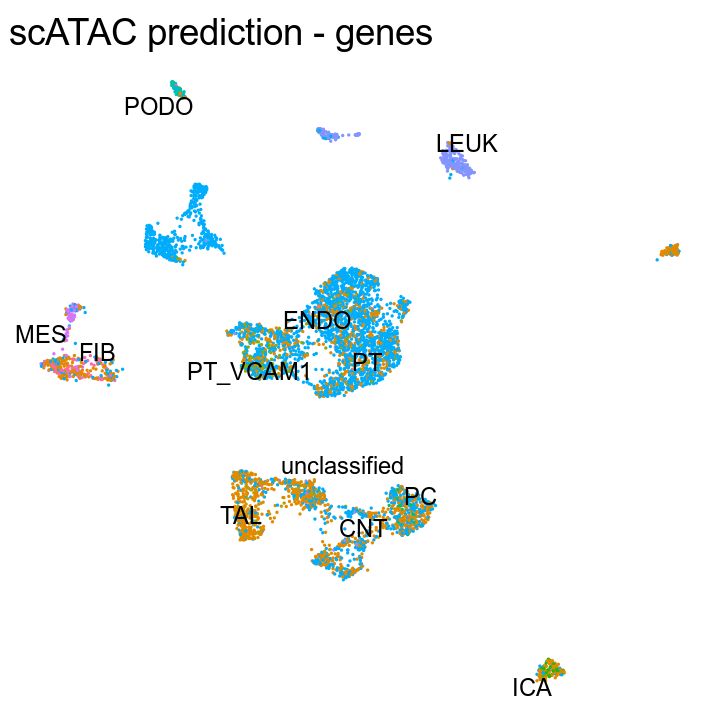

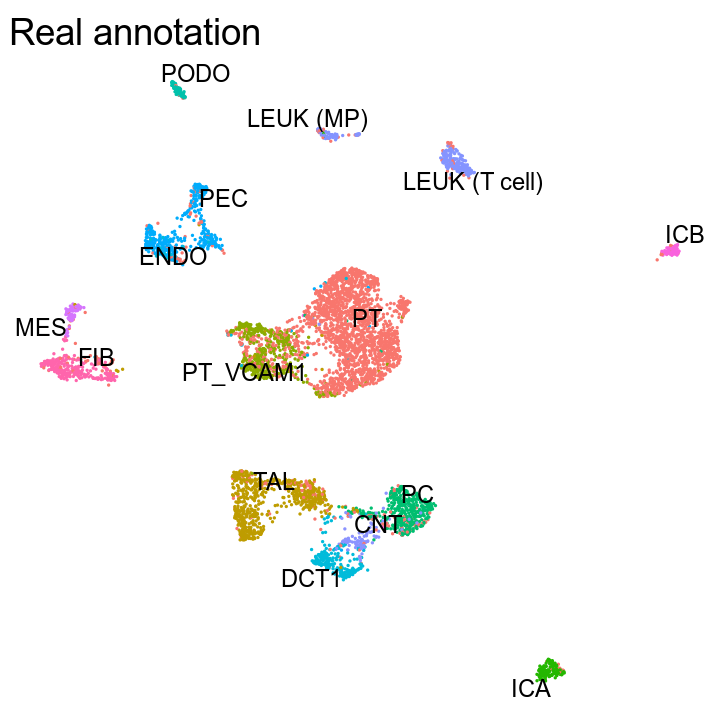

In [30]:
options(repr.plot.width=6, repr.plot.height=6)

DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,  cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("scATAC prediction - genes")
DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,  cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("Real annotation")

In [31]:
levels(kidney.atac.comb$ds_prediction)
levels(kidney.atac.comb$annotation)

[1] "CNT"          "ENDO"         "FIB"          "ICA"          "LEUK"        
 [6] "MES"          "PC"           "PODO"         "PT"           "PT_VCAM1"    
[11] "TAL"          "unclassified"

[1] "CNT"           "DCT1"          "ENDO"          "FIB"          
 [5] "ICA"           "ICB"           "LEUK (T cell)" "LEUK (MP)"    
 [9] "MES"           "PC"            "PEC"           "PODO"         
[13] "PT"            "PT_VCAM1"      "TAL"

In [33]:
library(plyr)
kidney.atac.comb$annotation <- revalue(as.factor(kidney.atac.comb$annotation),
                                      c("LEUK (MP)"="LEUK", "LEUK (T cell)"="LEUK"))

The following `from` values were not present in `x`: LEUK (MP), LEUK (T cell)



In [36]:
Idents(kidney.atac.comb) <- "ds_prediction"

levels(kidney.atac.comb$ds_prediction) <- c(
    levels(kidney.atac.comb$ds_prediction), 
    "DCT1", "ICB", "PEC")

mat_atac <- subset(kidney.atac.comb, idents = "unclassified", invert = TRUE)

#Creating confusion matrix
mat_atac$ds_prediction <- droplevels(mat_atac$ds_prediction)
confmat <- confusionMatrix(data=mat_atac$ds_prediction, reference = mat_atac$annotation)
confmat$overall

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(data = mat_atac$ds_prediction, reference = mat_atac$annotation):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.2701047      0.1903162      0.2562478      0.2843053      0.4648966 
AccuracyPValue  McnemarPValue 
     1.0000000            NaN

In [191]:
Idents(kidney.atac.comb) <- "ds_prediction"

# Compute the marker genes for the predicted annotation in our query dataset
atac.pred.rna.m <- FindAllMarkers(kidney.atac.comb, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(atac.pred.rna.m, file = "data/atac.pred.rna.m.rds")

Calculating cluster CNT

Calculating cluster ENDO

Calculating cluster FIB

Calculating cluster ICA

Calculating cluster LEUK

Calculating cluster MES

Calculating cluster PC

Calculating cluster PODO

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster TAL

Calculating cluster unclassified



In [37]:
atac.pred.rna.m <- readRDS("data/atac.pred.rna.m.rds")

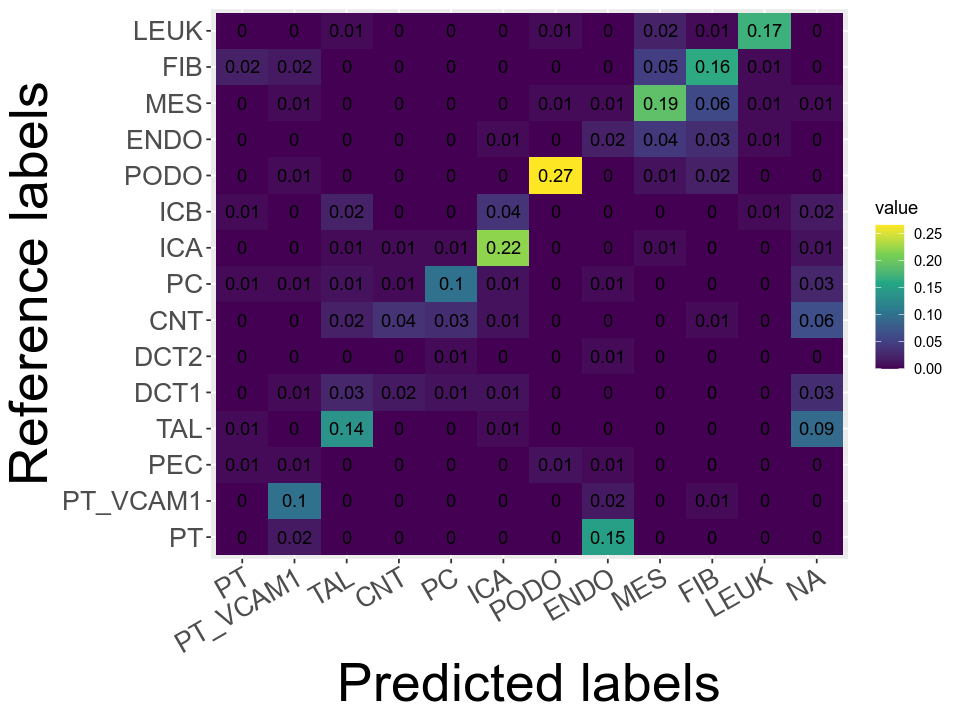

In [38]:
ref <- top_markers(multi.rna.m, ntop = 100)
q <- top_markers(atac.pred.rna.m, ntop = 100)

# Plot the Jaccard Index matrix as a heatmap to visualize
# the similarity between the gene expression of the clusters
# from the reference and the predicted in our query dataset
options(repr.plot.width=8, repr.plot.height=6)
ms <- matchSCore2(ref, q)
ms$gg + theme(axis.title = element_text(size=32))

In [100]:
# Clean the cache
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6799760,363.2,11075554,591.5,11075554,591.5
Vcells,385277149,2939.5,703649969,5368.5,703649969,5368.5


# Using the multiome peaks and the ATAC peaks

In [39]:
# Specify desired assay to work with chromatin accessibility
DefaultAssay(kidney.multi.comb) <- "peaks"
DefaultAssay(kidney.atac.comb) <- "peaks"

In [103]:
# These libraries are loaded for paralellization, they are optional
library(future)
plan(multisession)

# Find the gene markers for the reference where our model will be trained
# This is done right now with Wilcoxon test but it's recommended to use a logistic 
# regression model with technical variables to account for
multi.peaks.m <- FindAllMarkers(kidney.multi.comb, assay = "peaks", min.pct = 0.1, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(multi.peaks.m, file = "data/multi.peaks.m.rds")


Attaching package: ‘future’


The following object is masked from ‘package:caret’:

    cluster


The following object is masked from ‘package:keras’:

    %<-%


Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster PEC

Calculating cluster TAL

Calculating cluster DCT1

Calculating cluster DCT2

Calculating cluster CNT

Calculating cluster PC

Calculating cluster ICA

Calculating cluster ICB

Calculating cluster PODO

Calculating cluster ENDO

Calculating cluster MES

Calculating cluster FIB

Calculating cluster LEUK



In [40]:
multi.peaks.m <- readRDS("data/multi.peaks.m.rds")
dim(multi.peaks.m)

[1] 8770    7

In [105]:
# Check the top 4 accessible peaks for each of the reference clusters
top_markers(multi.peaks.m, ntop = 4)

$PT
[1] "chr5-151027778-151030481"  "chr10-86163190-86164729"  
[3] "chr10-5573385-5575081"     "chr10-106957942-106959225"

$PT_VCAM1
[1] "chr17-40509859-40510592"  "chr3-11136792-11137753"  
[3] "chr11-70247378-70248032"  "chr2-104789990-104790593"

$PEC
[1] "chr10-124063759-124064041" "chr12-1518983-1519472"    
[3] "chr22-27667122-27667480"   "chr6-111950610-111951164" 

$TAL
[1] "chr5-4480558-4481455"     "chr14-25833173-25834045" 
[3] "chr7-15167779-15168663"   "chr5-172700305-172701214"

$DCT1
[1] "chr7-70859290-70859685"  "chr16-85515996-85516320"
[3] "chr17-36823798-36824222" "chr18-51446954-51447859"

$DCT2
[1] "chr9-5427715-5428006"    "chr8-49047334-49047674" 
[3] "chr14-31508229-31508453" "chr10-5779733-5779933"  

$CNT
[1] "chr17-41529979-41530494"  "chr3-128435024-128435426"
[3] "chr19-22532158-22533261"  "chr20-768353-769070"     

$PC
[1] "chr12-49950288-49950872" "chr19-22325647-22326483"
[3] "chr17-10791917-10792503" "chr15-95923508-95924180"

$ICA
[1] "chr5-53891125-53891672"  "chr5-6527773-6528332"   
[3] "chr4-54472738-54473530"  "chr17-39236768-39237254"

$ICB
[1] "chr2-36121747-36122031"   "chr4-47471587-47471952"  
[3] "chr1-236480612-236481394" "chr2-217047175-217047861"

$PODO
[1] "chr10-112457791-112458149" "chr20-40446819-40447503"  
[3] "chr11-84825228-84825608"   "chr16-66247791-66248495"  

$ENDO
[1] "chr9-121325792-121326770" "chr18-7370542-7371204"   
[3] "chr16-16120117-16121206"  "chr16-66364314-66364969" 

$MES
[1] "chr10-9157613-9157942"   "chr12-58413789-58414192"
[3] "chr20-58199099-58199812" "chr16-80900189-80900828"

$FIB
[1] "chr15-39472613-39473568"   "chr1-236018849-236019554" 
[3] "chr12-115823543-115824256" "chr2-241899317-241899735" 

$LEUK
[1] "chr12-92593742-92594357"  "chr2-233331326-233331960"
[3] "chr11-14554870-14555252"  "chr1-159067812-159068541"

### Find common features between the two datasets and filter the others:

In [112]:
# Find a set of common peaks that are the most found in both datasets and are
# shared in both the reference and the query, in an iterative manner
common_peaks <- find_common_top_peaks(kidney.multi.comb, kidney.atac.comb, target_n_peaks = 10000)

Looking for 10000 top peaks


Selecting by percentile

Selecting by percentile



Found 9069 top peaks in common
Looking for 11000 top peaks


Selecting by percentile

Selecting by percentile



Found 10022 top peaks in common


In [97]:
# Or find the marker peaks that we have computed from the reference in the top more frequent
# accessible peaks from our query dataset, in an iterative manner
common_peaks <- find_refmarkers_in_top_peaks(multi.peaks.m, kidney.atac.comb)

ERROR: Error in levels(markers$cluster): object 'multi.peaks.m' not found


In [41]:
# Or find the marker peaks that we have computed from the reference in the accessible peaks
# from our query dataset, in an iterative manner
common_peaks <- find_refmarkers_in_peaks(multi.peaks.m, kidney.atac.comb, target_n_peaks = 10000)

Looking for 667 marker peaks from each label
Found 3367 peaks in common
Looking for 767 marker peaks from each label
Found 3566 peaks in common
Looking for 867 marker peaks from each label
Found 3766 peaks in common
Looking for 967 marker peaks from each label
Found 3964 peaks in common
Looking for 1067 marker peaks from each label
Found 4163 peaks in common
Looking for 1167 marker peaks from each label
Found 4362 peaks in common
Looking for 1267 marker peaks from each label
Found 4561 peaks in common
Looking for 1367 marker peaks from each label
Found 4758 peaks in common
Looking for 1467 marker peaks from each label
Found 4956 peaks in common
Looking for 1567 marker peaks from each label
Found 5155 peaks in common
Looking for 1667 marker peaks from each label
Found 5353 peaks in common
Looking for 1767 marker peaks from each label
Found 5551 peaks in common
Looking for 1867 marker peaks from each label
Found 5747 peaks in common
Looking for 1967 marker peaks from each label
Found 594

### Prepare the reference data and train model:

In [42]:
# Instantiate our model, specifying the desired features for
# our architecture
ds <- DeepScore(
        hidden_nodes=c(1024, 512, 128, 64), 
        common_features=common_peaks, 
        n_labels=16, 
        epochs=30, 
        batch_size=32, 
        activation="relu", 
        dropout=TRUE, 
        dropout_rate=0.5, 
        batchnorm=TRUE, 
        lr=0.001,
        weight_reg=TRUE
)

# Set the reference for our model and the information we want to transfer
ds <- ds %>% set_reference(kidney.multi.comb, kidney.multi.comb$annotation, assay="peaks")

[1] "Model evaluation on unseen data:"
     loss  accuracy 
0.9080870 0.7706422 


`geom_smooth()` using formula 'y ~ x'



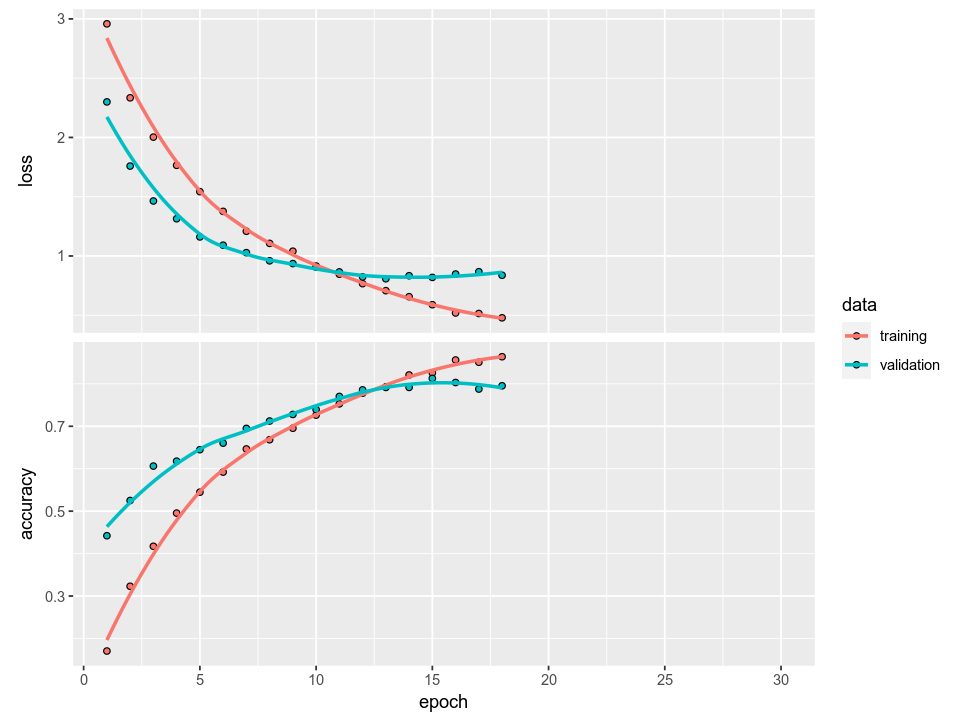

In [108]:
# Train the model, setting the patience (earlystopping is selected by default,
# and the patience indicates the number of epochs it will keep training when
# there is not a significant decrease in the model training loss)
ds <- ds %>% train(patience=5)

In [109]:
# Save the model
save_model_hdf5(ds$model, filepath = "data/kidney_peaks_model.hdf5")

### Predict the celltypes in our sample using the trained model:

In [43]:
# Load the model
ds$model <- load_model_hdf5(filepath="data/kidney_peaks_model.hdf5")

# Annotate our query dataset
kidney.atac.comb <- annotate(ds, query = kidney.atac.comb, assay = "peaks")
table(kidney.atac.comb$ds_prediction)


         CNT         DCT1         ENDO          FIB          ICA         LEUK 
         114           78          486          345          224          229 
         MES           PC         PODO           PT     PT_VCAM1          TAL 
           3          427           83         1840          542          740 
unclassified 
         527 

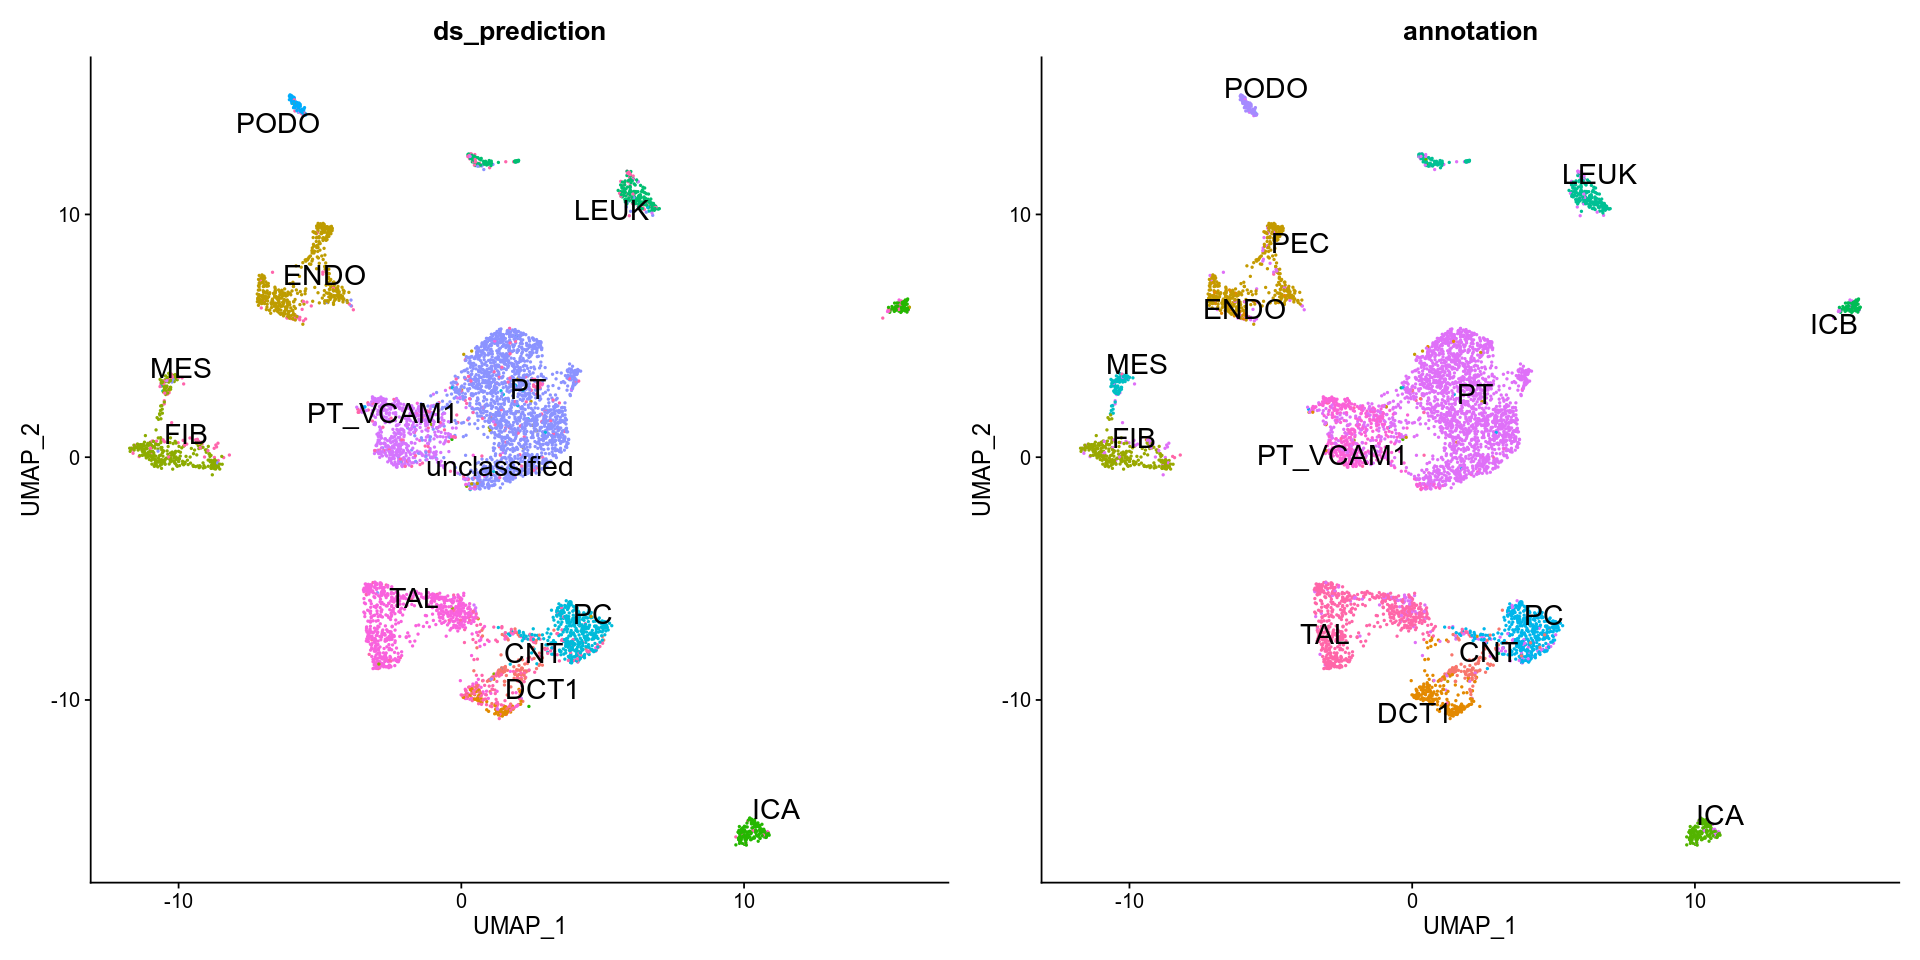

In [44]:
options(repr.plot.width=16, repr.plot.height=8)

# Visualize the predictions from our model in a UMAP and compare with ground truth anntoation
p1 <- DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()
p2 <- DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()

p1 + p2

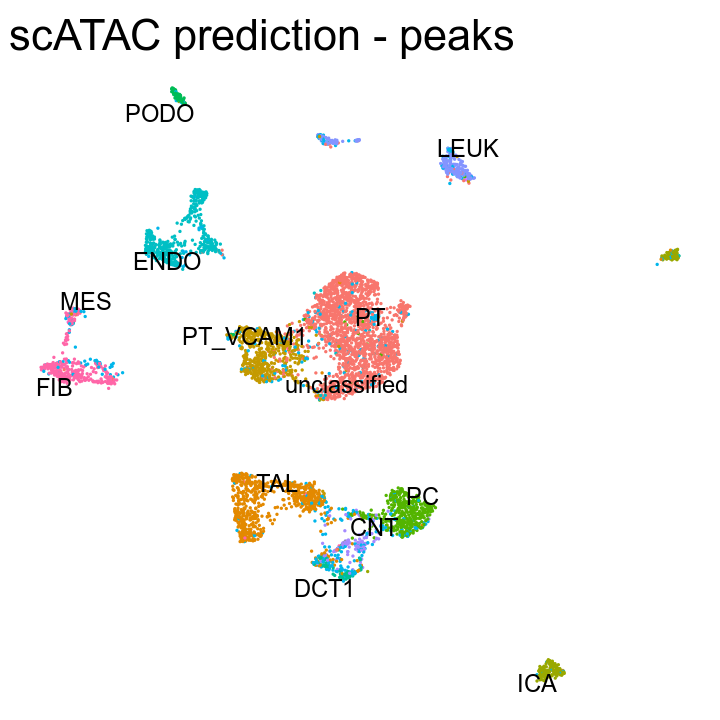

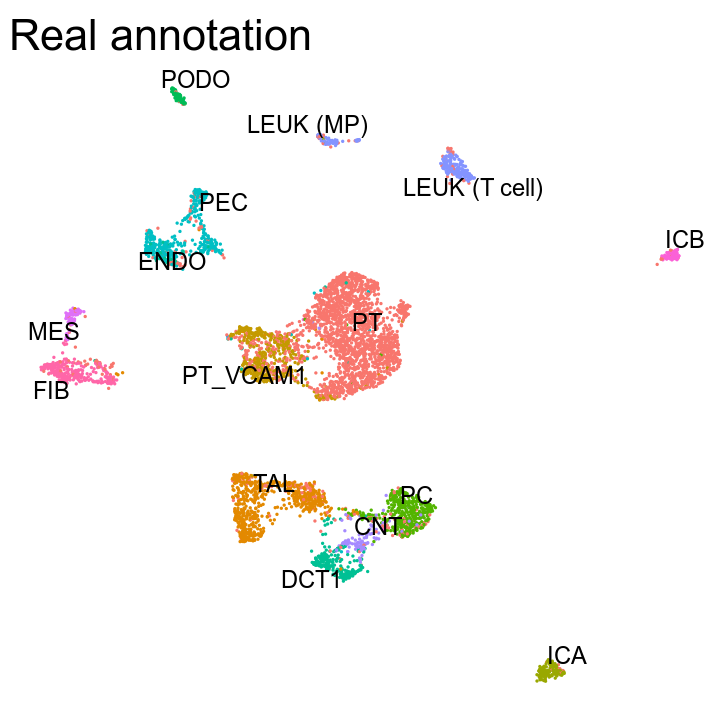

In [146]:
options(repr.plot.width=6, repr.plot.height=6)

DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE, cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=26)) + ggtitle("scATAC prediction - peaks")
DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,  cols = mycols,
        repel = TRUE, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=26)) + ggtitle("Real annotation")

In [45]:
levels(kidney.atac.comb$ds_prediction)
levels(kidney.atac.comb$annotation)

[1] "CNT"          "DCT1"         "ENDO"         "FIB"          "ICA"         
 [6] "LEUK"         "MES"          "PC"           "PODO"         "PT"          
[11] "PT_VCAM1"     "TAL"          "unclassified"

[1] "CNT"      "DCT1"     "ENDO"     "FIB"      "ICA"      "ICB"     
 [7] "LEUK"     "MES"      "PC"       "PEC"      "PODO"     "PT"      
[13] "PT_VCAM1" "TAL"

In [47]:
Idents(kidney.atac.comb) <- "ds_prediction"

levels(kidney.atac.comb$ds_prediction) <- c(
    levels(kidney.atac.comb$ds_prediction), c("ICB"))

mat_atac <- subset(kidney.atac.comb, idents = "unclassified", invert = TRUE)

#Creating confusion matrix
mat_atac$ds_prediction <- droplevels(mat_atac$ds_prediction)
confmat <- confusionMatrix(data=mat_atac$ds_prediction, reference = mat_atac$annotation)
confmat$overall

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(data = mat_atac$ds_prediction, reference = mat_atac$annotation):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.8687145      0.8365978      0.8591474      0.8778584      0.4095089 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

In [113]:
# Compute the marker genes for the predicted annotation in our query dataset
Idents(kidney.atac.comb) <- "ds_prediction"
atac.pred.peaks.m <- FindAllMarkers(kidney.atac.comb, assay = "peaks", min.pct = 0.1, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(atac.pred.peaks.m, file = "data/atac.pred.peaks.m.rds")

Calculating cluster CNT

Calculating cluster DCT1

Calculating cluster ENDO

Calculating cluster FIB

Calculating cluster ICA

Calculating cluster LEUK

Calculating cluster MES

Calculating cluster PC

Calculating cluster PODO

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster TAL

Calculating cluster unclassified

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”


In [144]:
atac.pred.peaks.m <- readRDS("data/atac.pred.peaks.m.rds")

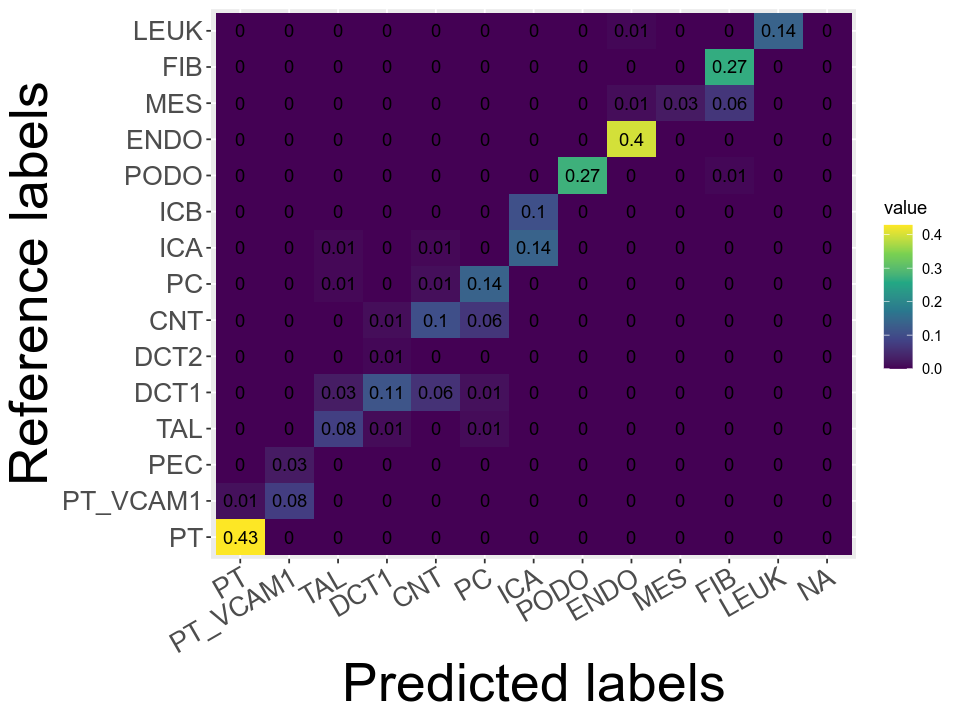

In [145]:
ref <- top_markers(multi.peaks.m, ntop = 100)
q <- top_markers(atac.pred.peaks.m, ntop = 100)

# Plot the Jaccard Index matrix as a heatmap to visualize
# the similarity between the gene expression of the clusters
# from the reference and the predicted in our query dataset
options(repr.plot.width=8, repr.plot.height=6)
ms <- matchSCore2(ref, q)
ms$gg + theme(axis.title = element_text(size=32))

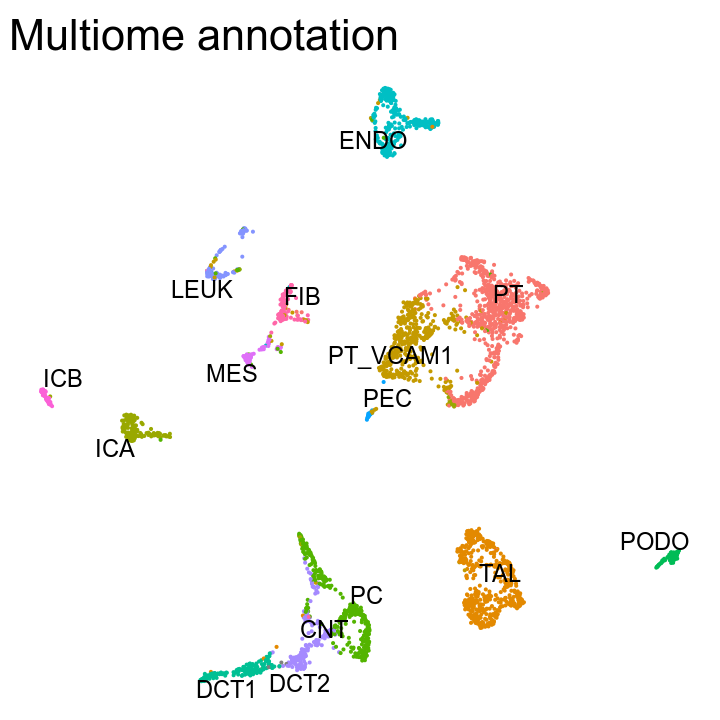

In [196]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(kidney.multi.comb, group.by = "annotation", label = T, 
        repel = T, cols = mycols,, label.size = 5) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=26)) + ggtitle("Multiome annotation")

In [119]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/pab/miniconda3/envs/csg.r/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] future_1.24.0      caret_6.0-91       lattice_0.20-45    keras_2.8.0.9000  
 [5] glue_1.6.2         ggplot2_3.3.5      dplyr_1.0.7        reshape2_1.4.4    
 [9] Signac_1.6.0       SeuratObject_4.0.4 Seurat_4.1.0      

loaded via a namespace (and not attached):
  [1] uuid_1.0-3             fastmatch_1